# Explore here

In [1]:
#pip install spotipy

In [2]:
import os
import requests 
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials



In [3]:

#  load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("SECRET")


In [4]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)
artist_id = 'spotify:artist:5BtHciL0e0zOP7prIHn3pP'

In [5]:
top_music = spotify.artist_top_tracks(artist_id)
top_ten_songs = []


In [6]:

for song in top_music['tracks']:
    top_ten_songs.append({'name' : song['name'],
                          'popularity' : song['popularity'],
                          'duration_ms' : song['duration_ms']/60000})
    
df = pd.DataFrame(top_ten_songs)
df_top_tres = df.sort_values(by='popularity', ascending=False).head(3)
df_top_tres

,name,popularity,duration_ms
0,The Diary of Jane - Single Version,75,3.342433
1,Breath,72,3.641100
2,I Will Not Bow,71,3.612217


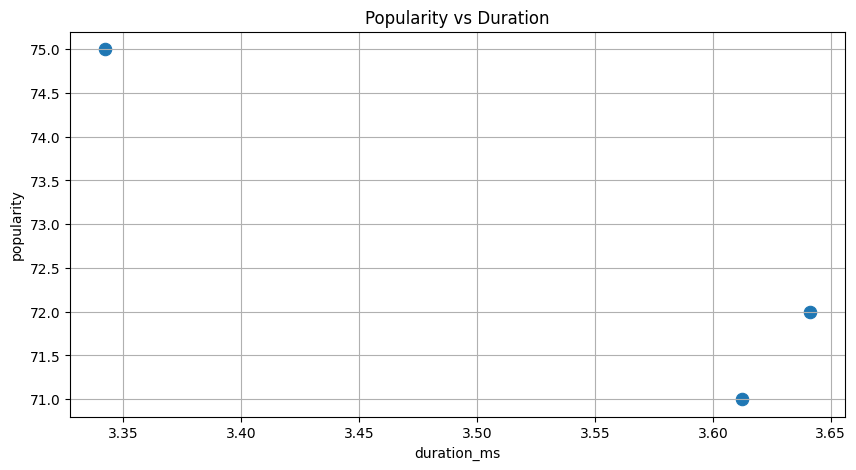

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(x='duration_ms', y='popularity', s=80, linewidths=0.8, data=df_top_tres)
plt.title('Popularity vs Duration')
plt.xlabel('duration_ms')
plt.ylabel('popularity')
plt.grid(True)
plt.show()

### Conclusión:


Realmente no considero que el tiempo de la canción influya en su popularidad, lo que influye son otros factores como:


- Letra

- Composición

- Fecha de lanzamiento